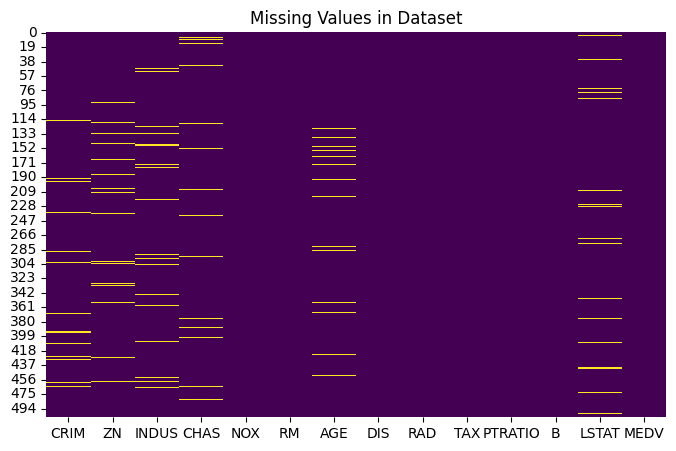

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# 1. Load Dataset
data = pd.read_csv("/content/HousingData.csv")

# 2. Visualize Missing Values
plt.figure(figsize=(8,5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Dataset")
plt.show()

# 3. Handle Missing Values
data = data.fillna(data.mean(numeric_only=True))


In [ ]:
# --- Slide 5: Feature & Target Split + Train–Test Split ---

# Features (X) and Target (y)
X = data.drop(columns=["MEDV"])
y = data["MEDV"]

# Train–Test split (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

# Shapes for your PPT screenshot
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train:", X_train.shape, " | X_test:", X_test.shape)
print("y_train:", y_train.shape, " | y_test:", y_test.shape)


X shape: (506, 13)
y shape: (506,)
X_train: (404, 13)  | X_test: (102, 13)
y_train: (404,)  | y_test: (102,)


In [ ]:
# --- Slide 6: Model Training ---

from sklearn.linear_model import LinearRegression

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

print(" Model trained successfully!")

# Optional: show coefficients (feature importance)
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print(coefficients)


 Model trained successfully!
    Feature  Coefficient
0      CRIM    -0.114140
1        ZN     0.029016
2     INDUS    -0.027133
3      CHAS     3.240673
4       NOX   -16.017543
5        RM     4.752410
6       AGE    -0.019520
7       DIS    -1.521593
8       RAD     0.222823
9       TAX    -0.009151
10  PTRATIO    -0.886045
11        B     0.012263
12    LSTAT    -0.438440


In [ ]:
# --- Slide 7: Predictions ---

# Make predictions on test data
y_pred = model.predict(X_test)

# Create a comparison table
results = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
}).reset_index(drop=True)

# Show first 10 rows for PPT
print(results.head(10))


   Actual Price  Predicted Price
0          23.6        29.143250
1          32.4        36.535668
2          13.6        14.492513
3          22.8        25.081110
4          16.1        18.456092
5          20.0        23.010494
6          17.8        18.138686
7          14.0        14.626517
8          19.6        22.115894
9          16.8        20.870636


In [ ]:
# --- Slide 8: Model Evaluation ---

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("===== Model Evaluation =====")
print("RMSE:", round(rmse, 2))
print("R² Score:", round(r2, 2))


===== Model Evaluation =====
RMSE: 5.0
R² Score: 0.66


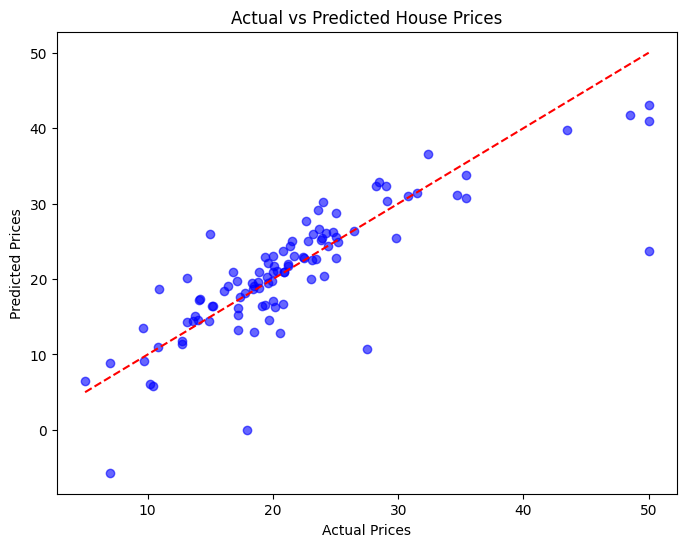

In [ ]:
# --- Slide 9: Actual vs Predicted Visualization ---

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [ ]:
# --- Slide 10: Predicted Price Ranking ---

# Create results DataFrame
results = pd.DataFrame({
    "Actual Price": y_test.values,
    "Predicted Price": y_pred
}).reset_index(drop=True)

# Sort houses by predicted price
sorted_houses = results.sort_values(by="Predicted Price", ascending=False)

# Top 10 most expensive houses (predicted)
print("===== Top 10 Most Expensive Houses (Predicted) =====")
print(sorted_houses.head(10))

# Bottom 10 cheapest houses (predicted)
print("\n===== Bottom 10 Cheapest Houses (Predicted) =====")
print(sorted_houses.tail(10))


===== Top 10 Most Expensive Houses (Predicted) =====
    Actual Price  Predicted Price
42          50.0        43.042849
77          48.5        41.775170
18          50.0        40.997235
54          43.5        39.797415
1           32.4        36.535668
51          35.4        33.833887
57          28.5        32.832690
41          28.2        32.369830
85          29.0        32.366538
62          31.5        31.415254

===== Bottom 10 Cheapest Houses (Predicted) =====
    Actual Price  Predicted Price
69          12.7        11.375018
72          10.8        11.032013
94          27.5        10.736836
83           9.7         9.197275
79           7.0         8.809160
75           5.0         6.450535
17          10.2         6.124202
91          10.4         5.782365
97          17.9         0.028734
12           7.0        -5.674985


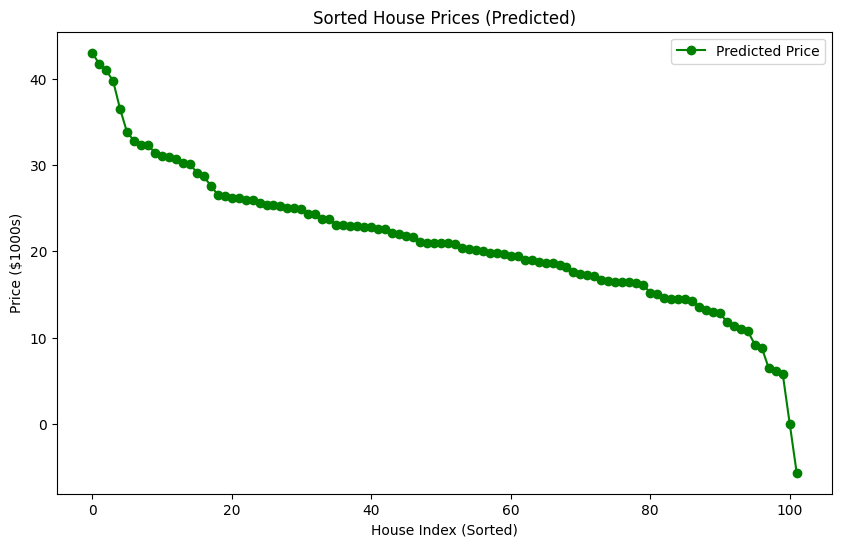

In [ ]:
# --- Slide 11: Sorted Predicted Prices ---

plt.figure(figsize=(10,6))
plt.plot(sorted_houses["Predicted Price"].values,
         marker="o", linestyle="-", color="green", label="Predicted Price")

plt.title("Sorted House Prices (Predicted)")
plt.xlabel("House Index (Sorted)")
plt.ylabel("Price ($1000s)")
plt.legend()
plt.show()
